In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import sys
import re
#import src.visualización as vs

In [2]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
df_crossfit_open_19 = pd.read_csv("../data/clean_open19.csv")

In [4]:
df_crossfit_open_19.head()

,Unnamed: 0,competitorid,competitorname,gender,countryoforiginname,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division_x,affiliate,division_y,ordinal,rank,scaled,score
0,0,2536,Samantha Briggs,F,United Kingdom,CrossFit Black Five,37,1.7,61.23,1,33,0,Women (35-39),Royal Docks CrossFit,Women,1,5,0,13550000
1,1,2536,Samantha Briggs,F,United Kingdom,CrossFit Black Five,37,1.7,61.23,1,33,0,Women (35-39),CrossFit Black Five,Women,2,160,0,14280325
2,2,2536,Samantha Briggs,F,United Kingdom,CrossFit Black Five,37,1.7,61.23,1,33,0,Women (35-39),CrossFit Berserk,Women,3,218,0,11710184
3,3,2536,Samantha Briggs,F,United Kingdom,CrossFit Black Five,37,1.7,61.23,1,33,0,Women (35-39),CrossFit Club La Santa,Women,4,9,0,11320172
4,4,2536,Samantha Briggs,F,United Kingdom,CrossFit Black Five,37,1.7,61.23,1,33,0,Women (35-39),CrossFit Club La Santa,Women,5,14,0,12100711


In [5]:
open_10 = df_crossfit_open_19.loc[(df_crossfit_open_19["overallrank"] < 11)]

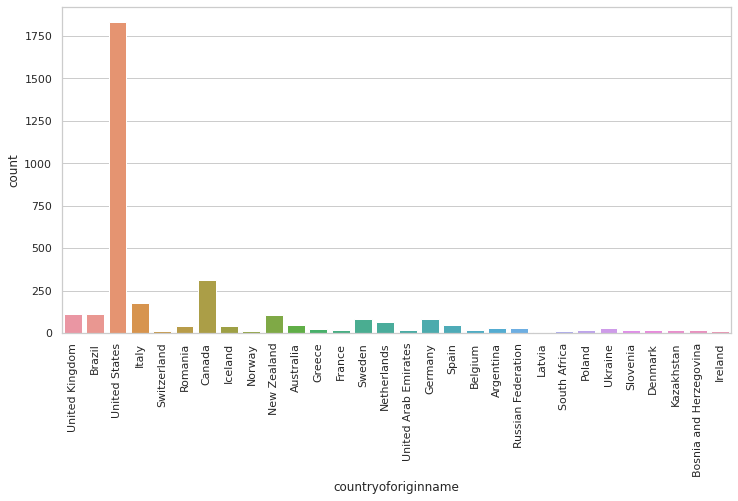

In [6]:
fig5 = sns.countplot(x=open_10.countryoforiginname)
plt.xticks(rotation=90);

In [7]:
open_10_Es = df_crossfit_open_19.loc[(df_crossfit_open_19["countryoforiginname"]== "Spain") & (df_crossfit_open_19["overallrank"] < 11)]

In [8]:
open_10_Es.head()

,Unnamed: 0,competitorid,competitorname,gender,countryoforiginname,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division_x,affiliate,division_y,ordinal,rank,scaled,score
1400415,1400415,1326207,Mercedes HernÃ¡ndez,F,Spain,CrossFit V,43,Unknown,63.0,6,341,1,Women (40-44),CrossFit V,Women,1,107705,1,2770000
1400416,1400416,1326207,Mercedes HernÃ¡ndez,F,Spain,CrossFit V,43,Unknown,63.0,6,341,1,Women (40-44),CrossFit V,Women,2,72176,1,4250305
1400417,1400417,1326207,Mercedes HernÃ¡ndez,F,Spain,CrossFit V,43,Unknown,63.0,6,341,1,Women (40-44),CrossFit V,Women,3,81919,1,1710272
1400418,1400418,1326207,Mercedes HernÃ¡ndez,F,Spain,CrossFit V,43,Unknown,63.0,6,341,1,Women (40-44),CrossFit V,Women,4,78889,1,1270469
1400419,1400419,1326207,Mercedes HernÃ¡ndez,F,Spain,CrossFit V,43,Unknown,63.0,6,341,1,Women (40-44),CrossFit V,Women,5,63433,1,2100634


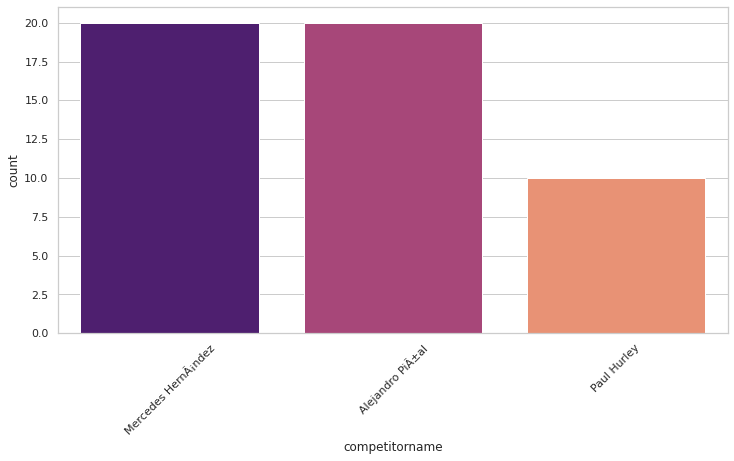

In [9]:
fig6 = sns.countplot(x=open_10_Es.competitorname, palette="magma")
plt.xticks(rotation=45);

In [10]:
df_top5_open_general = df_crossfit_open_19.loc[(df_crossfit_open_19["overallrank"] < 11)] 

In [11]:
df_open_19_woman = df_crossfit_open_19[df_crossfit_open_19["gender"] == "F"]

In [ ]:
fig = px.scatter(top5_open_19_w, x="age", y="weight", color="division_y")
fig.show()

In [13]:
df_score_country = df_open_19_woman[(df_open_19_woman["countryoforiginname"].isin(["Spain","Germany", "Portugal", "France", "Italy"]))] #& (df_open_19_woman["division_x"] == 'Women (35-39)')]

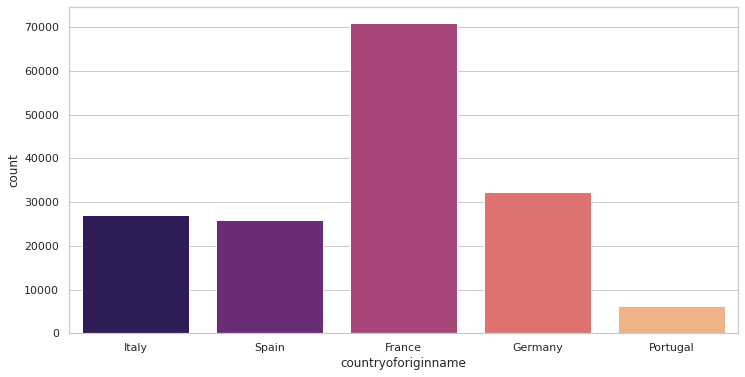

In [14]:
sns.countplot(x="countryoforiginname", data=df_score_country, palette="magma");

In [16]:
corr_19 = df_open_19_woman.corr()

In [17]:
corr_19

,Unnamed: 0,competitorid,age,overallrank,overallscore,is_scaled,ordinal,rank,scaled,score
Unnamed: 0,1.000000,1.933873e-01,3.377188e-01,1.104033e-01,7.299726e-02,2.135939e-01,1.579167e-06,0.070140,0.209355,-0.407284
competitorid,0.193387,1.000000e+00,-1.233896e-01,1.566600e-01,1.366770e-01,1.954143e-01,-2.644130e-15,0.131321,0.283478,-0.361244
age,0.337719,-1.233896e-01,1.000000e+00,-2.091365e-01,-2.323934e-01,8.909312e-02,-8.227936e-16,-0.223286,0.119977,-0.126792
overallrank,0.110403,1.566600e-01,-2.091365e-01,1.000000e+00,9.952249e-01,-4.259624e-01,-2.753322e-15,0.232102,0.027350,-0.193253
overallscore,0.072997,1.366770e-01,-2.323934e-01,9.952249e-01,1.000000e+00,-4.520636e-01,-3.030332e-15,0.228672,0.000891,-0.139375
is_scaled,0.213594,1.954143e-01,8.909312e-02,-4.259624e-01,-4.520636e-01,1.000000e+00,1.530728e-16,-0.034460,0.339817,-0.386265
ordinal,0.000002,-2.644130e-15,-8.227936e-16,-2.753322e-15,-3.030332e-15,1.530728e-16,1.000000e+00,-0.036315,-0.049289,-0.165345
rank,0.070140,1.313208e-01,-2.232862e-01,2.321020e-01,2.286725e-01,-3.445957e-02,-3.631498e-02,1.000000,0.012813,-0.212342
scaled,0.209355,2.834777e-01,1.199771e-01,2.734952e-02,8.909944e-04,3.398166e-01,-4.928900e-02,0.012813,1.000000,-0.567728
score,-0.407284,-3.612440e-01,-1.267920e-01,-1.932532e-01,-1.393749e-01,-3.862645e-01,-1.653448e-01,-0.212342,-0.567728,1.000000


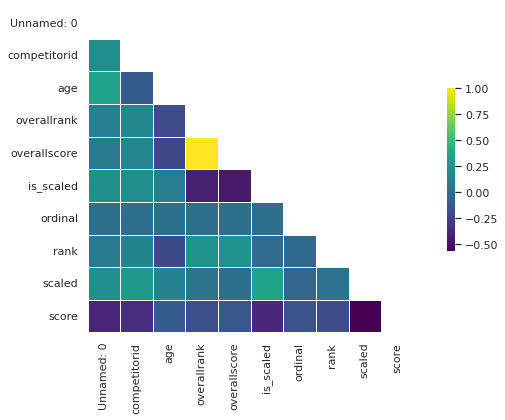

In [18]:
mascara = np.triu(np.ones_like(corr_19, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr_19,  
            mask = mascara,
            cmap="viridis",
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral
            #annot=True
);